## KNN Implementation

Here i'll check out the bias-variance tradeoff induced by k, both for scaled and unscaled data

I'll also see how increased dimensions will harm the r2 score and thus check how PCA helps

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
# train-validation split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
## 1. knn with no scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

k = [1, 3, 5, 10, 20, 50]

train_accuracies = []
val_accuracies = []

for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_val, y_val)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)


    print(f"k: {i}, train accuracy: {train_acc}, val accuracy: {val_acc}")



k: 1, train accuracy: 1.0, val accuracy: 0.9210526315789473
k: 3, train accuracy: 0.9538461538461539, val accuracy: 0.9298245614035088
k: 5, train accuracy: 0.9472527472527472, val accuracy: 0.9122807017543859
k: 10, train accuracy: 0.9406593406593406, val accuracy: 0.9298245614035088
k: 20, train accuracy: 0.9384615384615385, val accuracy: 0.9385964912280702
k: 50, train accuracy: 0.9208791208791208, val accuracy: 0.9298245614035088


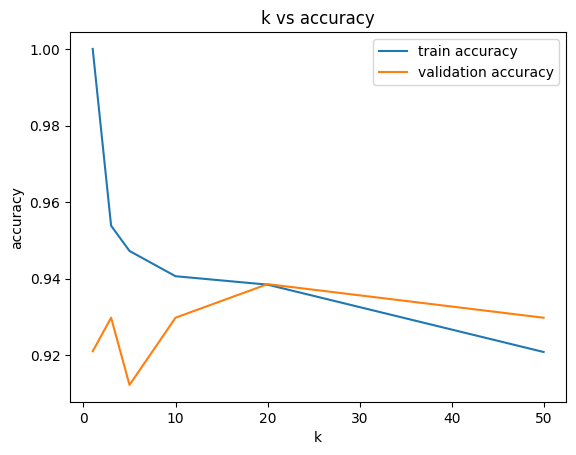

In [6]:
# plotting k vs train accuract and k vs validation accuracy

import matplotlib.pyplot as plt
plt.plot(k, train_accuracies, label="train accuracy")
plt.plot(k, val_accuracies, label="validation accuracy")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("k vs accuracy")
plt.legend()
plt.show()

In [7]:
## observations:

#1 for low k, as expected, high train accuracy and low validation accuracy (overfitting)
#2 as k increases, train accuracy decreases and validation accuracy increases 
#3 after a certain point, as k increases, both train and validation accuracy decreases (underfitting)
#4 best k is around 10-20, where we have a good balance between bias and variance
#5 best accuracy at best k (10-20) for unscaled data is around 0.95

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
# knn with scaling

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

train_accuracies_scaled = []
val_accuracies_scaled = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    train_acc = knn.score(X_train_scaled, y_train)
    val_acc = knn.score(X_val_scaled, y_val)

    train_accuracies_scaled.append(train_acc)
    val_accuracies_scaled.append(val_acc)


    print(f"k: {i}, train accuracy: {train_acc}, val accuracy: {val_acc}")



k: 1, train accuracy: 1.0, val accuracy: 0.9385964912280702
k: 3, train accuracy: 0.978021978021978, val accuracy: 0.9824561403508771
k: 5, train accuracy: 0.9736263736263736, val accuracy: 0.956140350877193
k: 10, train accuracy: 0.9758241758241758, val accuracy: 0.9649122807017544
k: 20, train accuracy: 0.9692307692307692, val accuracy: 0.9736842105263158
k: 50, train accuracy: 0.9494505494505494, val accuracy: 0.9473684210526315


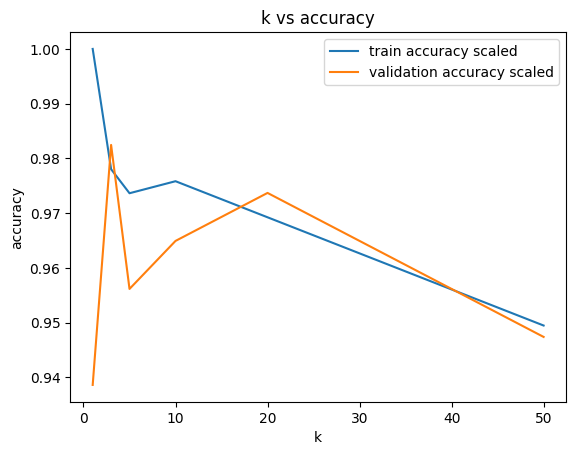

In [10]:
# plotting k vs train accuract and k vs validation accuracy

plt.plot(k, train_accuracies_scaled, label="train accuracy scaled")
plt.plot(k, val_accuracies_scaled, label="validation accuracy scaled")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("k vs accuracy")
plt.legend()
plt.show()


In [11]:
## Observations:

#1 scaling improves accuracy for low k (as expected theoretically)
#2 best accuracy at best k (10-20) for scaled data is around 0.97, which is an improvement over unscaled data (0.95)

In [14]:
# seeing if increased dimensionality kills knn

import numpy as np

X_train_scaled_aug = scaler.fit_transform(X_train)
X_val_scaled_aug = scaler.transform(X_val)

# adding noise
X_train_noise = np.random.randn(X_train.shape[0], 50)
X_val_noise = np.random.randn(X_val.shape[0], 50)

X_train_scaled_with_noise = np.hstack([X_train_scaled_aug, X_train_noise])
X_val_scaled_with_noise = np.hstack([X_val_scaled_aug, X_val_noise])

train_accuracies_scaled_noise = []
val_accuracies_scaled_noise = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled_with_noise, y_train)

    train_acc = knn.score(X_train_scaled_with_noise, y_train)
    val_acc = knn.score(X_val_scaled_with_noise, y_val)

    train_accuracies_scaled_noise.append(train_acc)
    val_accuracies_scaled_noise.append(val_acc)

    print(f"k: {i}, train accuracy: {train_acc}, val accuracy: {val_acc}")


k: 1, train accuracy: 1.0, val accuracy: 0.8947368421052632
k: 3, train accuracy: 0.9538461538461539, val accuracy: 0.9473684210526315
k: 5, train accuracy: 0.9428571428571428, val accuracy: 0.9473684210526315
k: 10, train accuracy: 0.9472527472527472, val accuracy: 0.956140350877193
k: 20, train accuracy: 0.945054945054945, val accuracy: 0.9385964912280702
k: 50, train accuracy: 0.9208791208791208, val accuracy: 0.9473684210526315


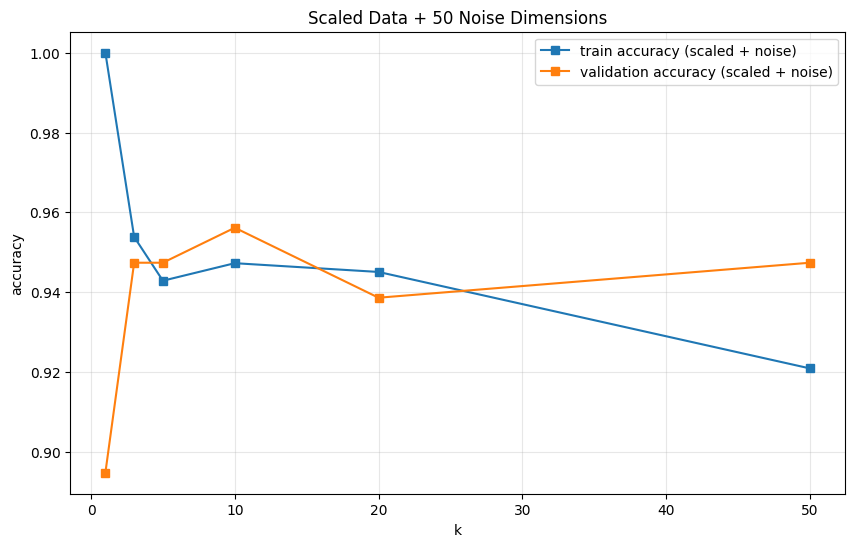

In [17]:
# Compare scaled data vs scaled data with noise

plt.figure(figsize=(10, 6))
plt.plot(k, train_accuracies_scaled_noise, label="train accuracy (scaled + noise)", marker='s')
plt.plot(k, val_accuracies_scaled_noise, label="validation accuracy (scaled + noise)", marker='s')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Scaled Data + 50 Noise Dimensions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
## observations: 
# adding 50 noise dimensions significantly reduces accuracy for low k (as expected theoretically)
# best accuracy at best k (10-20) for scaled data with noise is around 0.93, which is a significant drop from scaled data without noise (0.97)

In [20]:
## adding PCA to reduce dimensionality and see if it improves accuracy

from sklearn.decomposition import PCA

pca = PCA(n_components=20)

X_train_pca = pca.fit_transform(X_train_scaled_with_noise)
X_val_pca = pca.transform(X_val_scaled_with_noise)

train_accuracies_pca = []
val_accuracies_pca = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)

    train_acc = knn.score(X_train_pca, y_train)
    val_acc = knn.score(X_val_pca, y_val)

    train_accuracies_pca.append(train_acc)
    val_accuracies_pca.append(val_acc)

    print(f"k: {i}, train accuracy: {train_acc}, val accuracy: {val_acc}")

k: 1, train accuracy: 1.0, val accuracy: 0.9210526315789473
k: 3, train accuracy: 0.9714285714285714, val accuracy: 0.9385964912280702
k: 5, train accuracy: 0.9626373626373627, val accuracy: 0.956140350877193
k: 10, train accuracy: 0.9560439560439561, val accuracy: 0.9385964912280702
k: 20, train accuracy: 0.9516483516483516, val accuracy: 0.9298245614035088
k: 50, train accuracy: 0.9362637362637363, val accuracy: 0.956140350877193


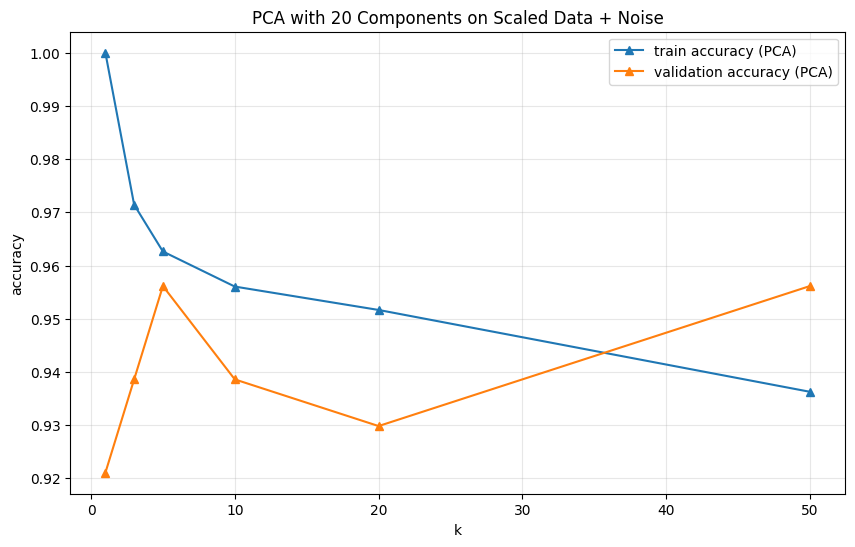

In [21]:
## plotting k vs train accuract and k vs validation accuracy for PCA

plt.figure(figsize=(10, 6))
plt.plot(k, train_accuracies_pca, label="train accuracy (PCA)", marker='^')
plt.plot(k, val_accuracies_pca, label="validation accuracy (PCA)", marker='^')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("PCA with 20 Components on Scaled Data + Noise")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
## observations:
#1 PCA improves accuracy compared to scaled data with noise, but does not fully recover the accuracy of scaled data without noise
#2 best accuracy at best k (10-20) for PCA on scaled data with noise is around 0.95, 
# which is an improvement over scaled data with noise (0.93) but still not as good as scaled data without noise (0.97)